# Conditional likelihoods of trajectories

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from scipy import stats

import os

os.environ['GILLESPIE'] = '/dev/shm/Git/Gillespie/cmake-build-release/Gillespie'

In [3]:
matplotlib.rc_file_defaults()

In [4]:
from analyzer import analyzer

In [6]:
def load_signal(i):
    return analyzer.load_trajectory(pathlib.Path('/data/signal/sig{}.traj'.format(i)))

def load_response(sig, res):
    return analyzer.load_trajectory(pathlib.Path('/data/response/res{}-{}.traj'.format(sig, res)))

In [7]:
def make_histogram(*data):
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.grid(True)
    for datum in data:
        kde = stats.gaussian_kde(datum)
        x = np.geomspace(1.0/np.max(datum), np.max(datum), 100)
        ax.plot(x, kde.pdf(x))
    return fig

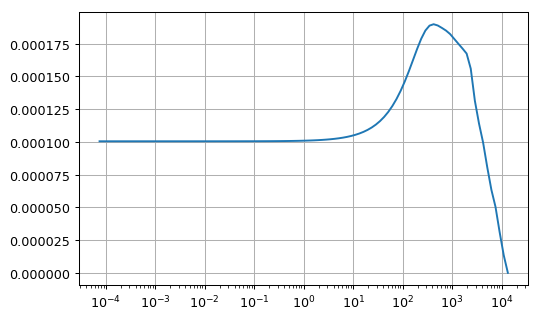

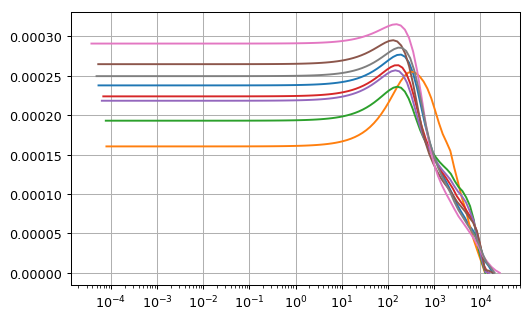

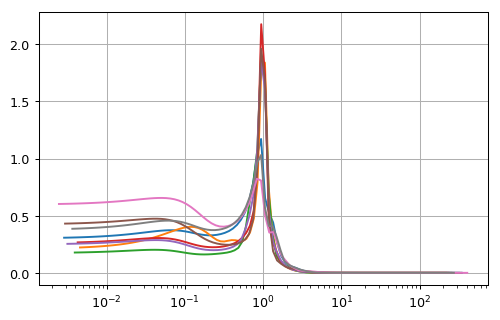

In [48]:
sig = load_signal(1)
res = load_response(1,0)

l1 = analyzer.likelihoods_given_signal(res, sig)

l2 = []
for i in range(2, 10):
    sig = load_signal(i)
    l = analyzer.likelihoods_given_signal(res, sig)
    l2.append(l)

p1 = make_histogram(l1)
p2 = make_histogram(*l2)
p3 = make_histogram(*(l/l1 for l in l2))

/home/ipausers/reinhardt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


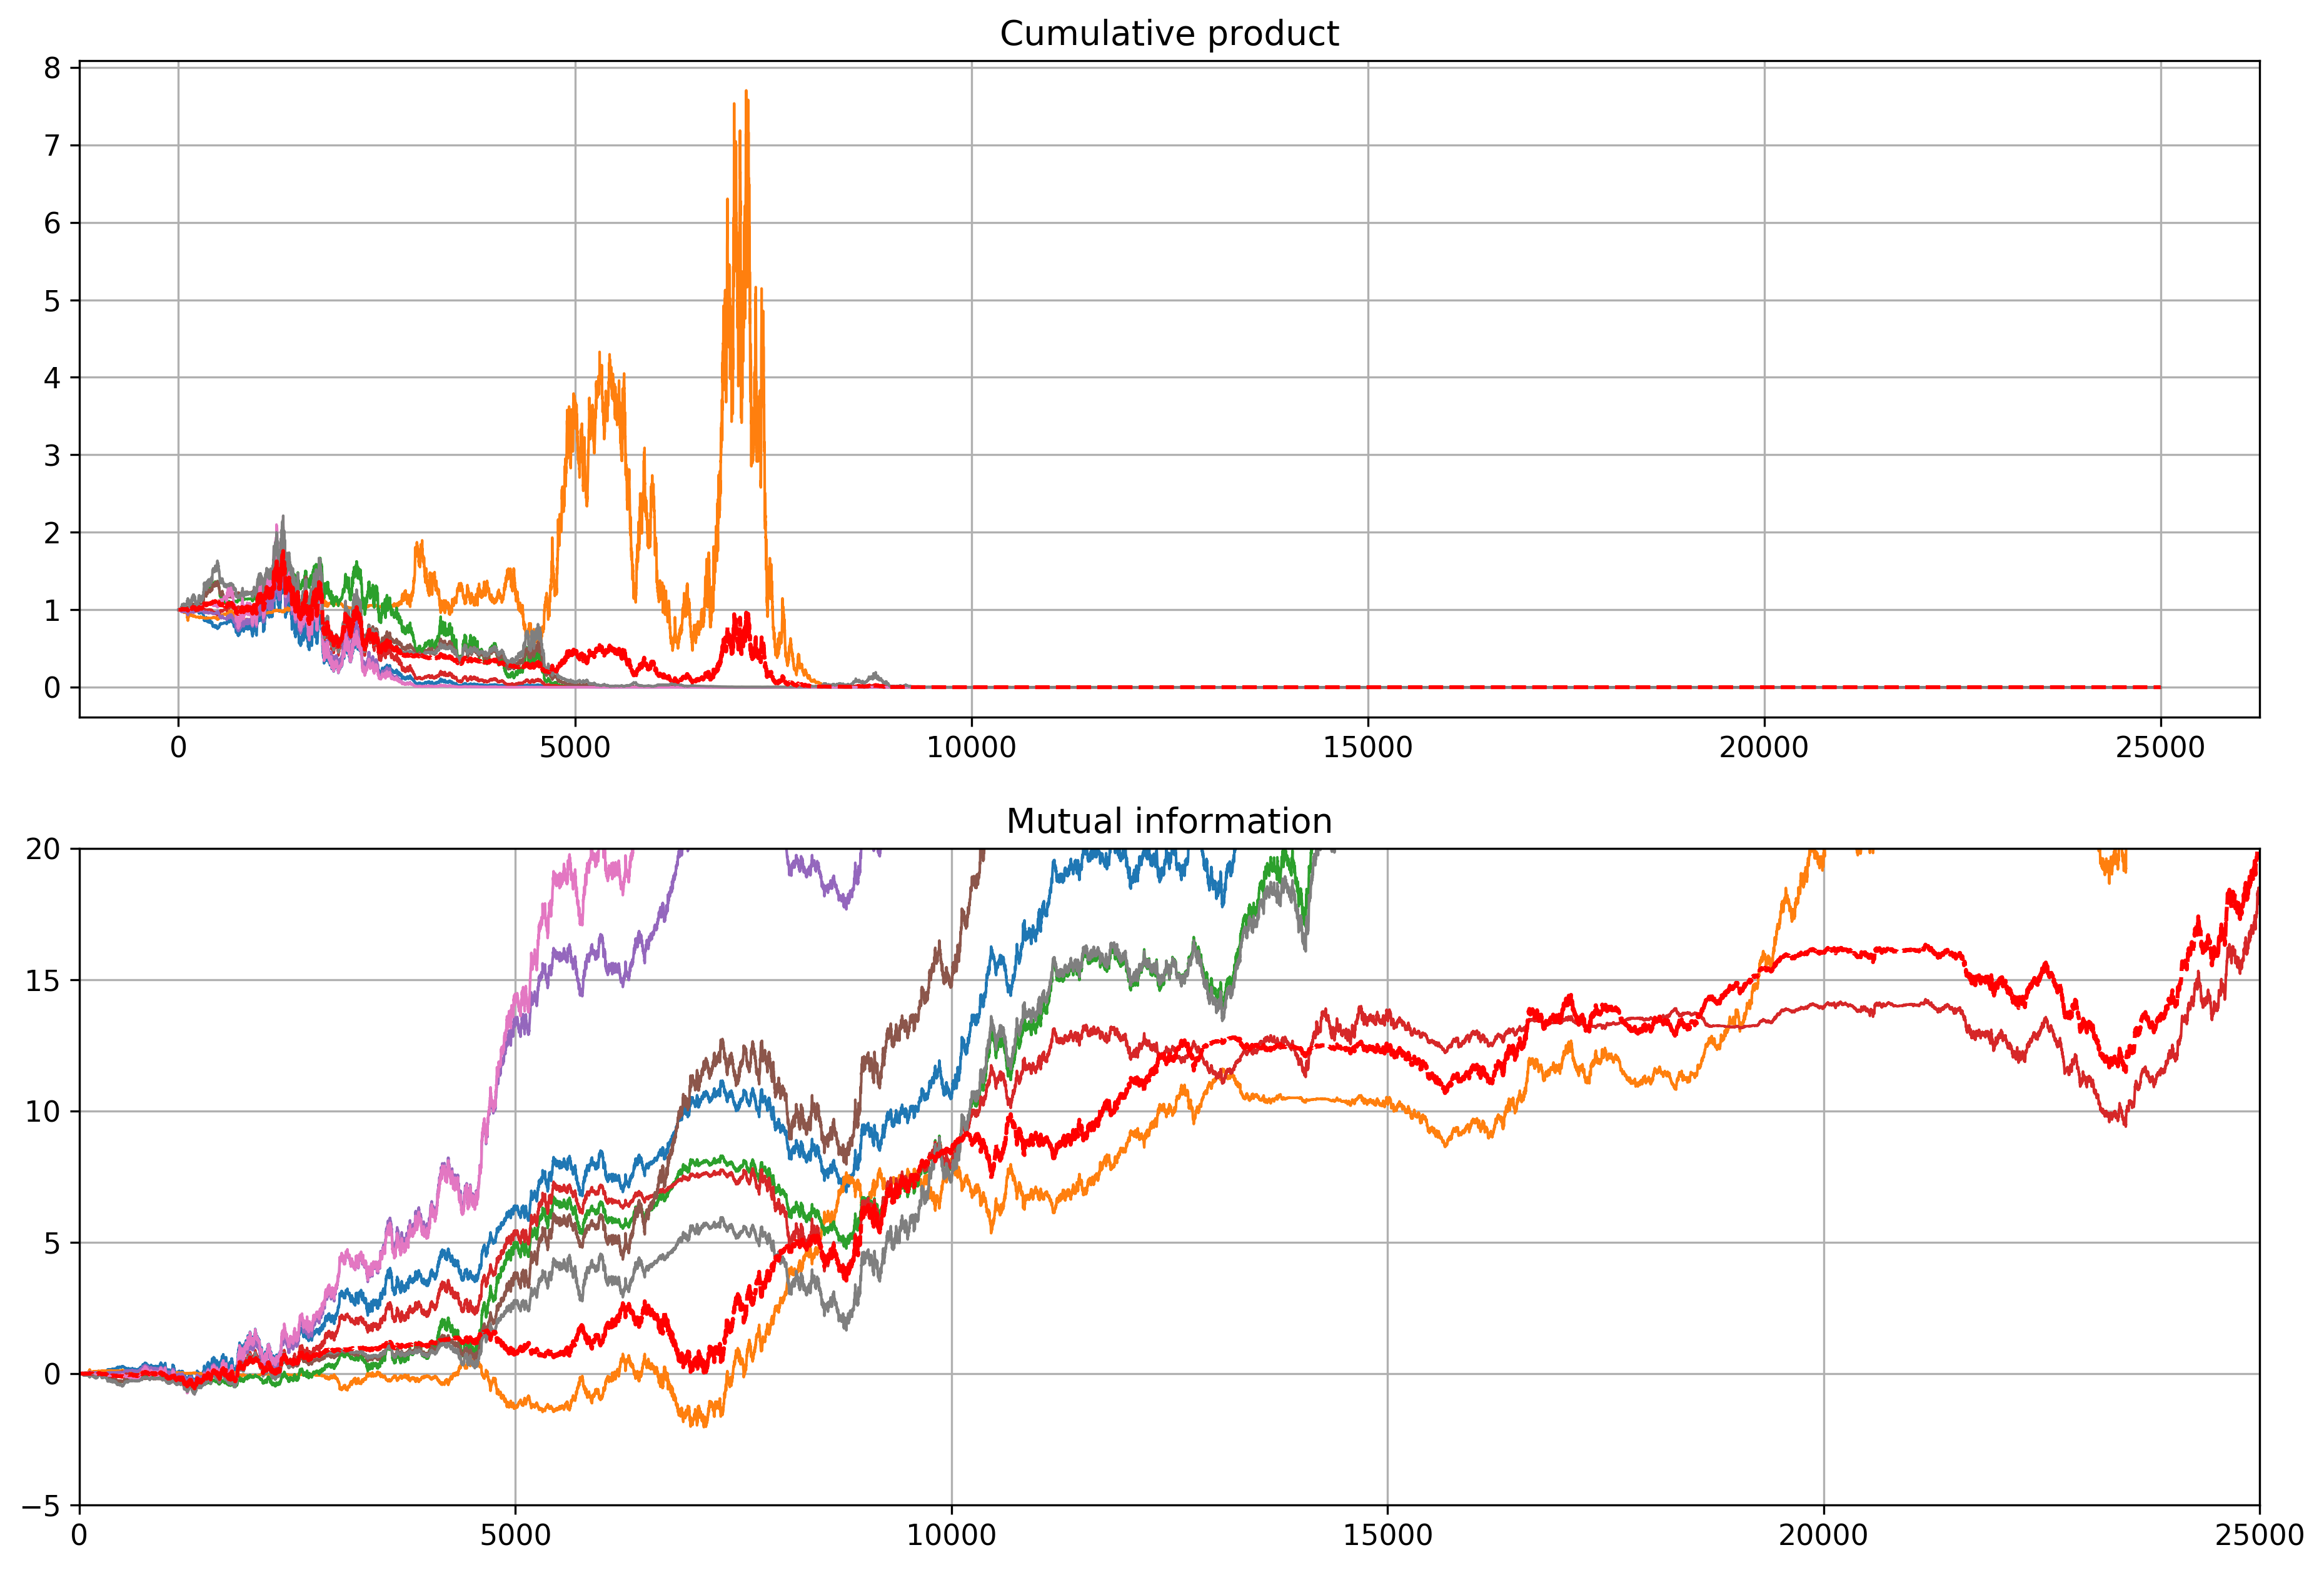

In [8]:
sig = load_signal(1)
res = load_response(1,0)

fig, (ax1, ax2) = plt.subplots(2,1)
limit = 200000
limit_p = 25000
for i in range(2, 10):
    other_sig = load_signal(i)
    likelihood_other = analyzer.likelihoods_given_signal(res, other_sig)
    likelihood_this = analyzer.likelihoods_given_signal(res, sig)
    cumulative_prod = np.cumprod(likelihood_other/likelihood_this)
    ax1.plot(np.arange(limit_p), cumulative_prod[:limit_p], linewidth=1)
    cumulative_sum = np.cumsum(np.log(likelihood_other/likelihood_this))
    ax2.plot(np.arange(limit), -cumulative_sum[:limit], linewidth=1)

likelihoods = np.array([analyzer.likelihoods_given_signal(res, load_signal(i))/analyzer.likelihoods_given_signal(res, sig) for i in range(2,10)])
meanprod = np.mean(np.cumprod(likelihoods, axis=-1), axis=0)
ax1.plot(np.arange(limit_p), meanprod[:limit_p], linestyle='--', color='red')
trylog = np.log(meanprod)
ax2.plot(np.arange(limit), -trylog[:limit], linestyle='--', color='red')

fig.set_size_inches(15, 10)

ax1.grid(True)
ax2.grid(True)

ax1.set_title("Cumulative product")
ax2.set_title("Mutual information");

ax2.set_xlim([0, 25000])
ax2.set_ylim([-5,20])

plt.savefig("cumulative.pdf")

/home/ipausers/reinhardt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


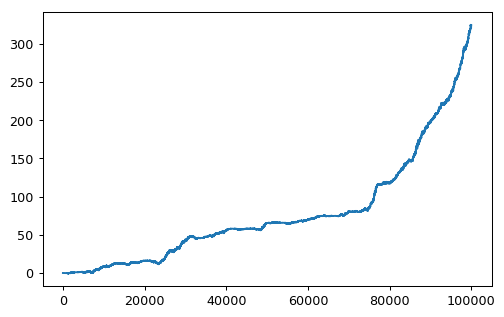

In [39]:
meanprod = np.mean(np.cumprod(likelihoods, axis=-1), axis=0)
trylog = np.log(meanprod)
plt.plot(np.arange(100000), -trylog[:100000])

In [9]:
np.nonzero(meanprod)

(array([     0,      1,      2, ..., 160807, 160808, 160809]),)

In [5]:
mutual_informations = np.load('/data/mutual_information.npz')['arr_0']
mutual_information = np.mean(mutual_informations, axis=0)

In [6]:
mutual_informations.shape

(2500, 100000)

In [9]:
import numpy.random

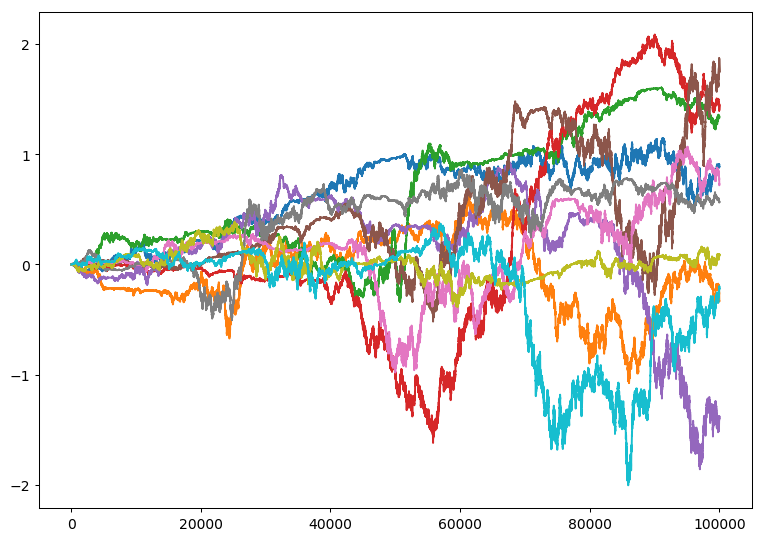

In [11]:
indices = numpy.random.randint(0, len(mutual_informations)-1, 10)
for inf in mutual_informations[indices]:
    plt.plot(np.arange(len(inf)), inf)

In [13]:
def subset_indices(num_responses, subset_signals, subset_responses):
    assert subset_responses <= num_responses
    indices = np.zeros(subset_signals * subset_responses, dtype=int)
    for s in range(subset_signals):
        for r in range(subset_responses):
            indices[s*subset_responses + r] = s*num_responses + r
    return indices
    

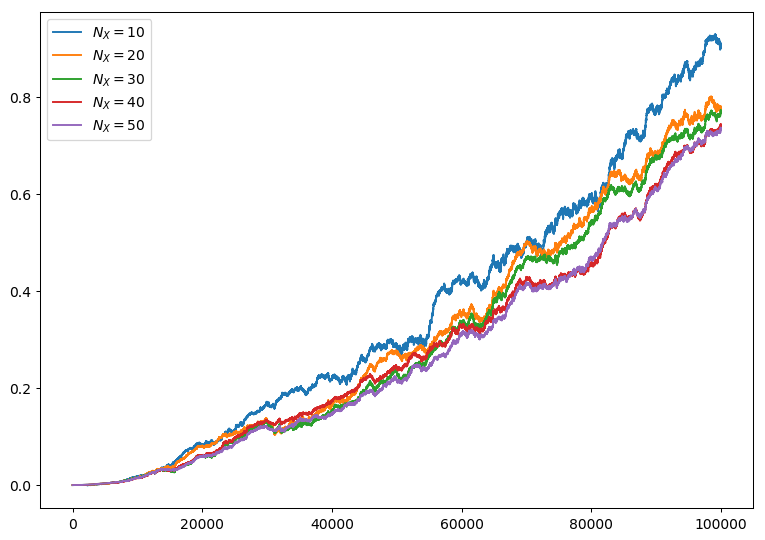

In [23]:
for r in [10, 20, 30, 40]:
    indices = subset_indices(50, 50, r)
    subset_mean = np.mean(mutual_informations[indices], axis=0)
    plt.plot(np.arange(len(subset_mean)), subset_mean, label='$N_X={}$'.format(r))
plt.plot(np.arange(len(mutual_information)), mutual_information, label='$N_X=50$')
plt.legend();

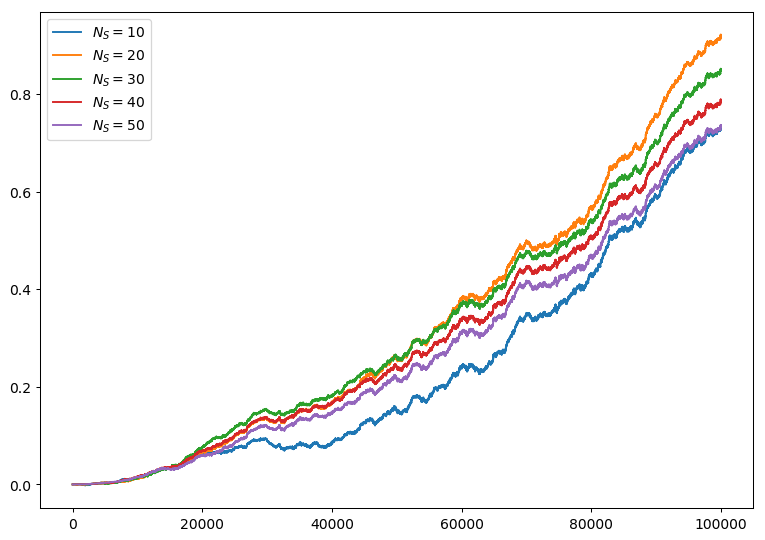

In [24]:
for s in [10, 20, 30, 40]:
    indices = subset_indices(50, s, 50)
    subset_mean = np.mean(mutual_informations[indices], axis=0)
    plt.plot(np.arange(len(subset_mean)), subset_mean, label='$N_S={}$'.format(s))
plt.plot(np.arange(len(mutual_information)), mutual_information, label='$N_S=50$')
plt.legend();